In [9]:
import tensorflow

In [10]:
from keras.models import  Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.optimizers import Adam

In [11]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
from livelossplot import PlotLossesKeras

In [12]:
callback = [ModelCheckpoint(
       "tmp_models/tmpmodel.h5",
        save_weights_only = True,
        save_best_only = True,
        monitor = 'val_accuracy'),
        EarlyStopping(patience=3,monitor='val_accuracy'),
        PlotLossesKeras()    
           ]

In [13]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(64,64,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)       

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
train_set = train_datagen.flow_from_directory('data/train',
                                              target_size=(64,64),
                                              batch_size=25,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = test_datagen.flow_from_directory('data/test',
                                           target_size=(64,64),
                                           batch_size=25,
                                           class_mode='categorical',
                                           shuffle=False)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


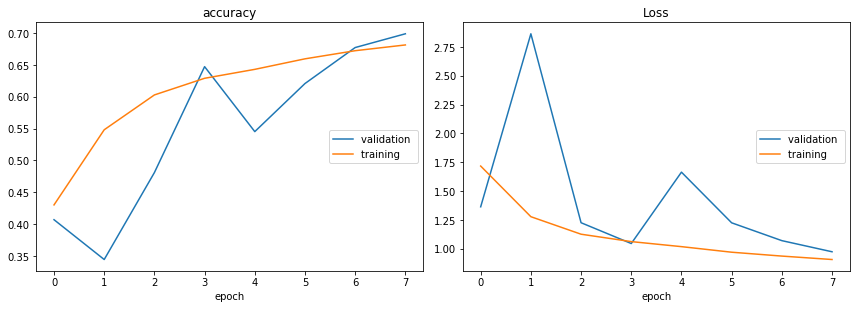

accuracy
	validation       	 (min:    0.345, max:    0.699, cur:    0.699)
	training         	 (min:    0.430, max:    0.681, cur:    0.681)
Loss
	validation       	 (min:    0.974, max:    2.864, cur:    0.974)
	training         	 (min:    0.907, max:    1.717, cur:    0.907)


In [17]:
model.fit_generator(train_set,
                  validation_data=test_set,
                  steps_per_epoch=2000,
                  validation_steps=400,
                  epochs=8,
                  callbacks = callback  
                  )

In [18]:
model.save('Final Model')

In [28]:
from keras.models import model_from_json

In [32]:
model_json = model.to_json()

with open('model.json','w') as file:
    file.write(model_json)

# Predictions 

In [38]:
import cv2
import matplotlib.pyplot as plt

In [35]:
train_set.class_indices

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

[0]
[0]
[0]
[0]
[0]


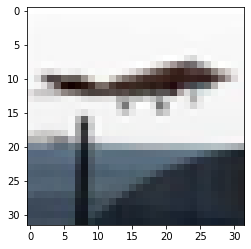

In [41]:
for i in range (1,6):
    img =cv2.imread('predictions/'+str(i)+'.png')
    plt.imshow(img)
    
    img = cv2.resize(img,(64,64))
    img = img.reshape(1,64,64,3)
    
    y_pred = model.predict_classes(img)
    print(y_pred)